In [ ]:
import keras
from keras import layers
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape + x_test.shape

(60000, 28, 28, 1, 10000, 28, 28, 1)

In [ ]:
y = np.hstack([y_train, y_test])

Text(0.5, 1.0, 'Labels in MNIST dataset')

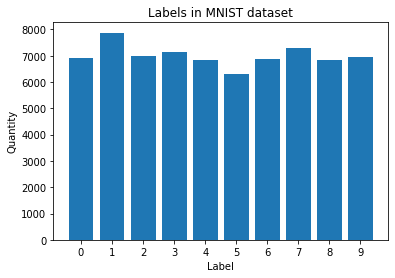

In [ ]:
unique, counts = np.unique(y, return_counts=True)
plt.bar(unique, counts)
plt.xticks(unique)
plt.xlabel("Label")
plt.ylabel("Quantity")
plt.title("Labels in MNIST dataset")

In [ ]:
encoder = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Flatten()
])

In [ ]:
decoder = keras.Sequential([
    keras.Input(shape=(128, )),
    layers.Reshape((4, 4, 8)),
    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'),
])

In [ ]:
img = keras.Input(shape = (28, 28, 1))
latent_vector = encoder(img)
output = decoder(latent_vector)

autoencoder = keras.Model(inputs = img, outputs = output)
autoencoder.compile(optimizer='adam', loss = "binary_crossentropy", metrics=['accuracy'])

In [ ]:
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 4, 4, 8)           0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 up_sampling2d (UpSampling2D  (None, 8, 8, 8)          0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 8)           584       
                                                                 
 up_sampling2d_1 (UpSampling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 16)       

In [ ]:
history = autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 16s 19ms/step - loss: 0.2556 - accuracy: 0.7925 - val_loss: 0.1643 - val_accuracy: 0.7932
Epoch 2/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1533 - accuracy: 0.7995 - val_loss: 0.1435 - val_accuracy: 0.8017
Epoch 3/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1368 - accuracy: 0.8042 - val_loss: 0.1292 - val_accuracy: 0.8053
Epoch 4/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1257 - accuracy: 0.8070 - val_loss: 0.1213 - val_accuracy: 0.8069
Epoch 5/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1194 - accuracy: 0.8085 - val_loss: 0.1158 - val_accuracy: 0.8078
Epoch 6/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1151 - accuracy: 0.8095 - val_loss: 0.1125 - val_accuracy: 0.8091
Epoch 7/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1123 - accuracy: 0.8100 - val_loss: 0.1102 - val_accuracy

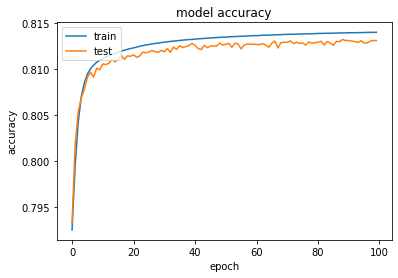

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
x = np.vstack([x_train, x_test])

encoded_images = encoder.predict(x)

In [ ]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(encoded_images)

In [ ]:
labels = np.hstack([y_train, y_test])

In [ ]:
labels == 1

array([False, False, False, ..., False, False, False])

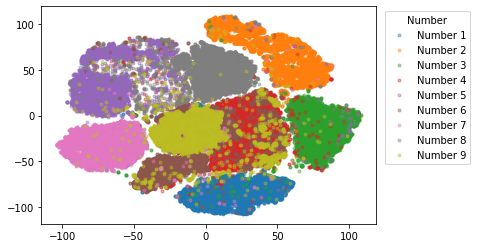

In [ ]:
n = len(X_embedded)
for i in range(9):
  cluster_label = f"Number {i+1}"
  x = X_embedded[:, 0][labels == i]
  y = X_embedded[:, 1][labels == i]
  plt.plot(x, y, '.', alpha=0.4, label= cluster_label)

plt.legend(title="Number",loc = 'upper left', bbox_to_anchor=(1.01,1))

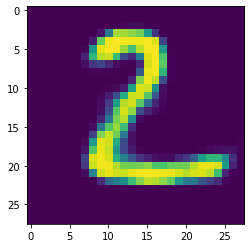

In [ ]:
plt.imshow(decoder.predict(np.array([encoded_images[1]]))[0].reshape((28, 28)))

In [ ]:
from sklearn.neighbors import KDTree
kdt = KDTree(encoded_images, leaf_size=30, metric='euclidean')

In [ ]:
K = 10
only_knn = []

for i in kdt.query([encoded_images[1]], k=K, return_distance=False)[0]:
  only_knn.append(encoded_images[i])

only_knn = np.array(only_knn)

In [ ]:
p_knn = decoder.predict(only_knn)

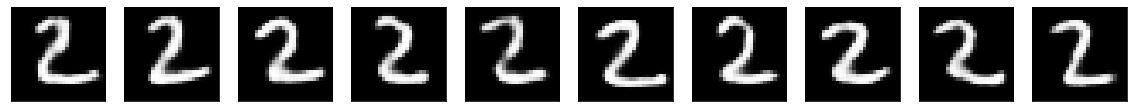

In [ ]:
n = K
plt.figure(figsize=(20, 4))

for i in range(0, n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(p_knn[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [ ]:
encoder.save('encoder.h5')
decoder.save('decoder.h5')